## biclosed.py revisited

In [1]:
from discopy import monoidal

class Ty(monoidal.Ty):
    @staticmethod
    def upgrade(old):
        if len(old) == 1 and isinstance(old[0], (Over, Under)):
            return old[0]
        return Ty(*old.objects)
        
    def __init__(self, *objects, left=None, right=None):
        self.left, self.right = left, right
        super().__init__(*objects)

    def __lshift__(self, other):
        return Over(self, other)

    def __rshift__(self, other):
        return Under(self, other)

    def __matmul__(self, other):
        return Ty(*(self.tensor(other)))


class Over(Ty):
    """ Forward slash types. """
    def __init__(self, left=None, right=None):
        Ty.__init__(self, self, left=left, right=right)

    def __repr__(self):
        return "Over({}, {})".format(repr(self.left), repr(self.right))

    def __str__(self):
        return "({} << {})".format(self.left, self.right)

    def __eq__(self, other):
        if not isinstance(other, Over):
            return False
        return self.left == other.left and self.right == other.right


class Under(Ty):
    """ Backward slash types. """
    def __init__(self, left=None, right=None):
        Ty.__init__(self, self, left=left, right=right)

    def __repr__(self):
        return "Under({}, {})".format(repr(self.left), repr(self.right))

    def __str__(self):
        return "({} >> {})".format(self.left, self.right)

    def __eq__(self, other):
        if not isinstance(other, Under):
            return False
        return self.left == other.left and self.right == other.right

In [2]:
x = Ty('x')
assert x >> x << x == Over(Under(Ty('x'), Ty('x')), Ty('x'))
assert x >> (x << x) == Under(Ty('x'), Over(Ty('x'), Ty('x')))
x0, x1, y0, y1, m = Ty('x0'), Ty('x1'), Ty('y0'), Ty('y1'), Ty('m')
lens = (x0 >> m @ y0) @ ( m @ x1 >> y1)
lens

Ty(Under(Ty('x0'), Ty('m', 'y0')), Under(Ty('m', 'x1'), Ty('y1')))

## Interface with operad.Tree

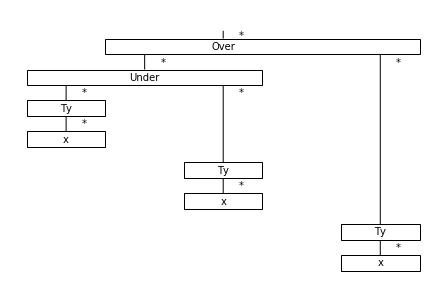

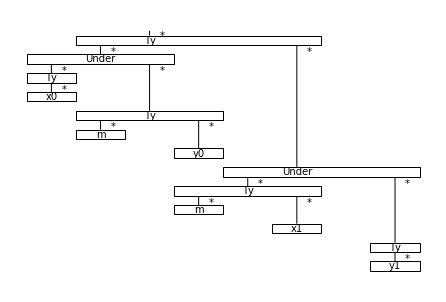

In [6]:
from discopy.operad import Box, Ob, tree2diagram

star = Ob('*')
UNDER = Box('Under', star, [star, star])
OVER = Box('Over', star, [star, star])
TY = lambda n: Box('Ty', star, n * [star])

def to_tree(ty):
    if isinstance(ty, Over):
        return OVER(to_tree(ty.left), to_tree(ty.right))
    if isinstance(ty, Under):
        return UNDER(to_tree(ty.left), to_tree(ty.right))
    if isinstance(ty, Ty):
        n = len(ty.objects)
        return TY(n)(*map(to_tree, ty.objects))
    if isinstance(ty, Ob):
        return Box(ty.name, star, [])
    raise NotImplementedError()

tree2diagram(to_tree(x >> x << x)).draw()
tree2diagram(to_tree(lens)).draw()